# Fremstilling av Utslipp

Behandling av data:



In [1]:


import sys  
import pandas as pd
import os

if os.getcwd().split(os.path.sep)[-1] == "processed_data":
    os.chdir("..")

from src.Utslipp import analyze_clean_utslipp_data, statitics_plot, plots_part_2 ,MissingValues


file_path_utslipp = "raw_data/data/Utslippdata.csv"
df = pd.read_csv(file_path_utslipp)

df_clean = analyze_clean_utslipp_data(df)
plotter = statitics_plot(df_clean)



##### Visualisering av gjennomsnittlige totalutlipp per år 

Figur 1: gir en oversikt over Co2 utslipp over tid ved bruk av gjennomsnitt. Gjenomsnittet gir middelverdi representasjon av utslippene per år. I figur 1 


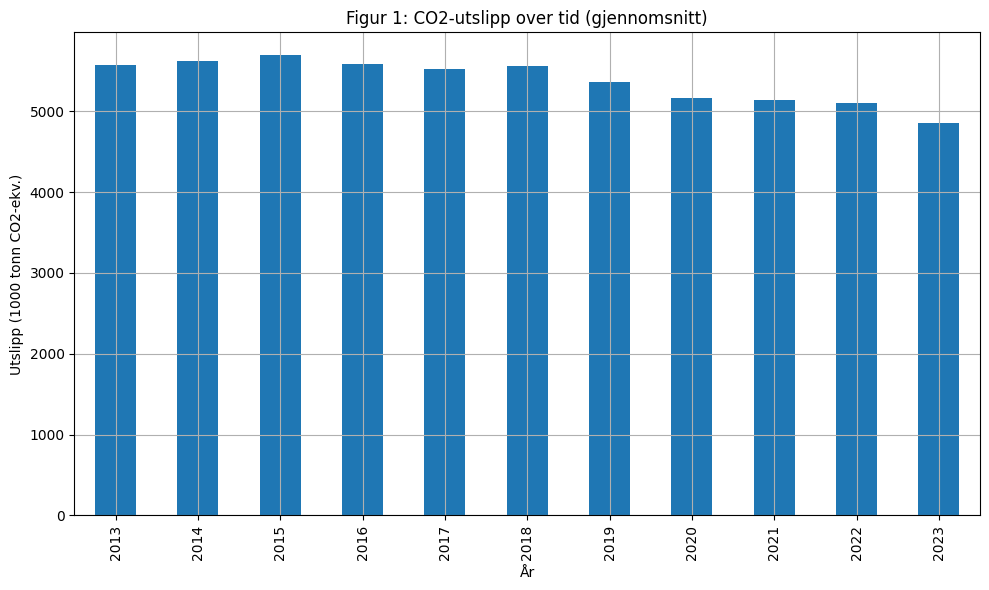

In [2]:
mean = plotter.plot_co2_per_year_mean()


##### Visualisering av CO2 utslipp over tid i median

Figur 2: Gir ett annen innblikk på utslippet i median. Ved bruk av median vil ikke ekstremverdier forsvinne og vil gi et mer representivt fremstilling av utslippet. Vi ser dermed at den største andelen av utslipp foregår i  2018 motsetning til gjenomsnittlig som foregår i 2015 vist på figur 1.

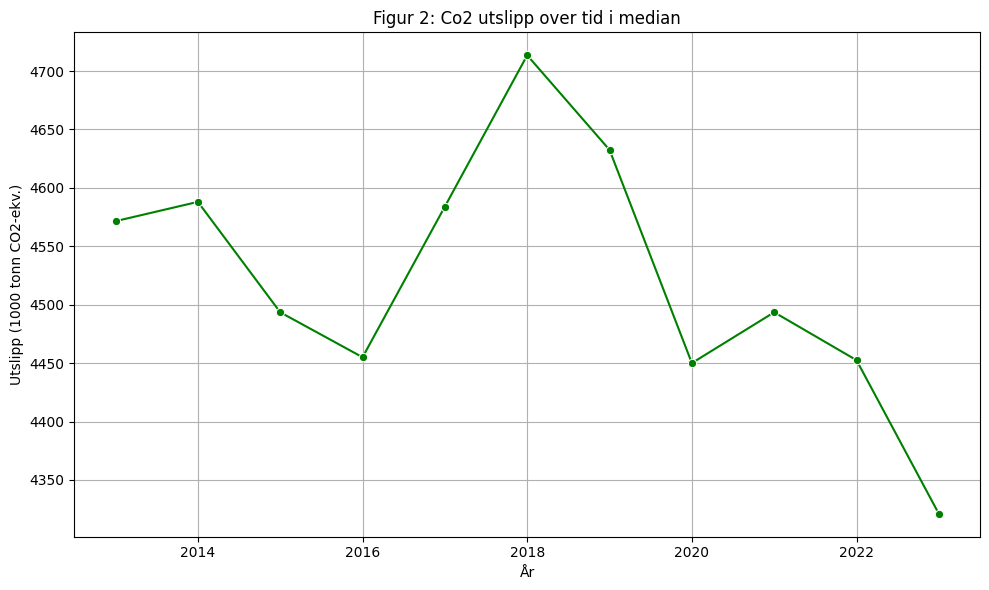

In [3]:
plotter.plot_co2_per_year_median()

##### Gjennomsnittlige CO2-utslipp per kilde 

På figur 3 fremstilliger den gjennomsnittlige Co2-utslipp per kilde. Her ser vi at Olje-og gassutvinning utgjør den gjennomsnittlige største utslippen per tid. Vi ser også at det er andre kilder som også bidrar til et stor andel av utslipp som Industri og bergverk og veitrafrikk. Jordbruk utgjør en minimal andel av Co2 utslipp. 

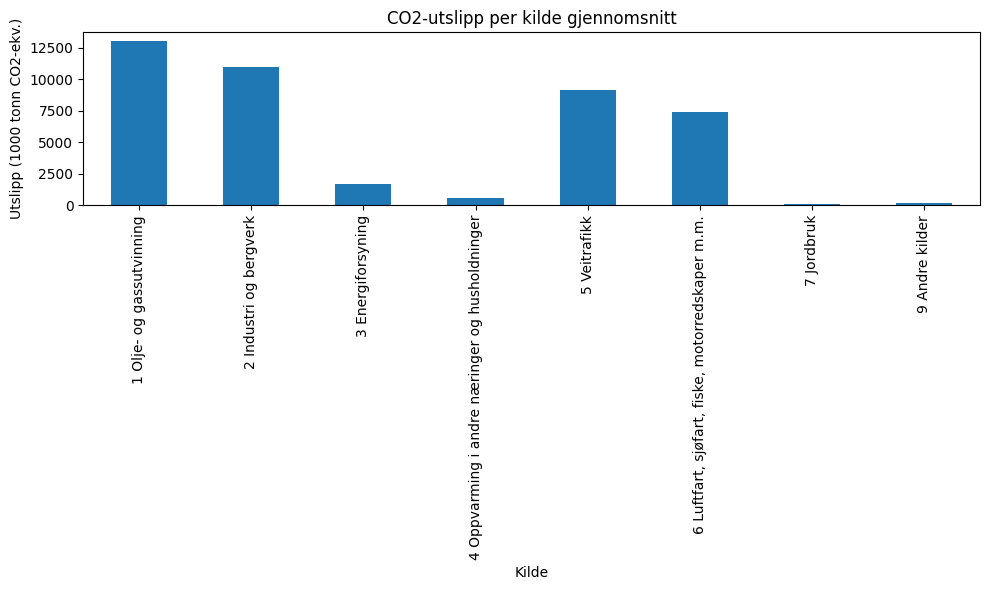

In [4]:
plotter.plot_co2_per_source_mean()

##### CO2-utslipp av per kilde i standardavvik

På figur 4 kan vi se CO2-utslipp per kilde i standardavvik. Standardavvik er et mål på datakvalitet og jevnhet. På figur 4 kan vi se at olje og gassutvinning so tyder på at olje - og gasutvinning har betrakelig reduserdt gjennom årene i motsetning til energiforsyning som har mindre varasjon gjennom årene.


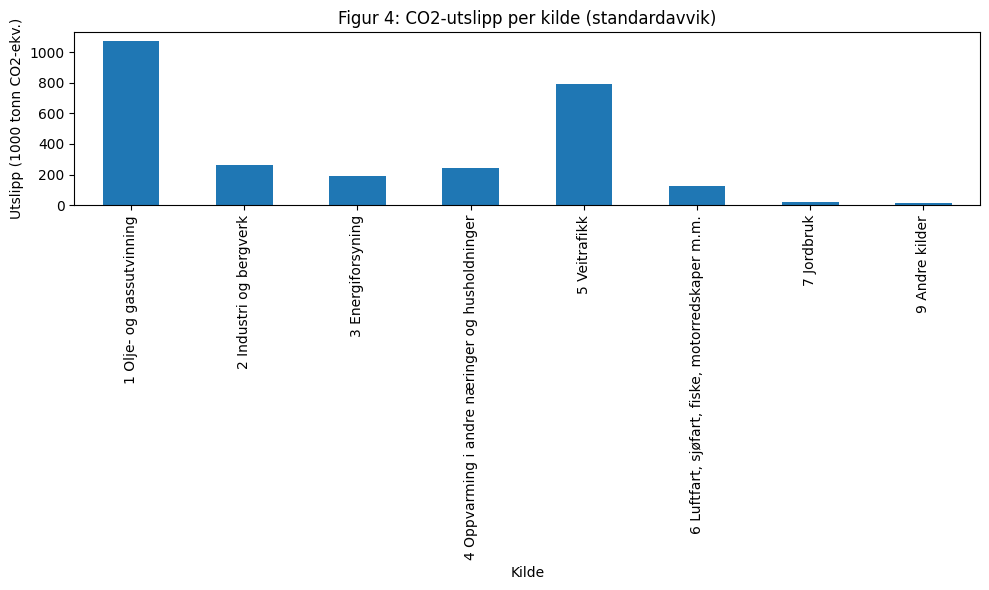

In [5]:
std = plotter.plot_co2_per_year_std()


##### Varmekart over kilder, år og mengden av utslipp

På figur 5 kan du se et fremstilling av all dataen på et varmekart. Hensikten til figuren er å se forldet av utslipp mellom de ulike kildenen per år. Vi ser for eksempel at noen kilder har høyt utslipp i perioden 2013-2023 som Industri og bergverk.

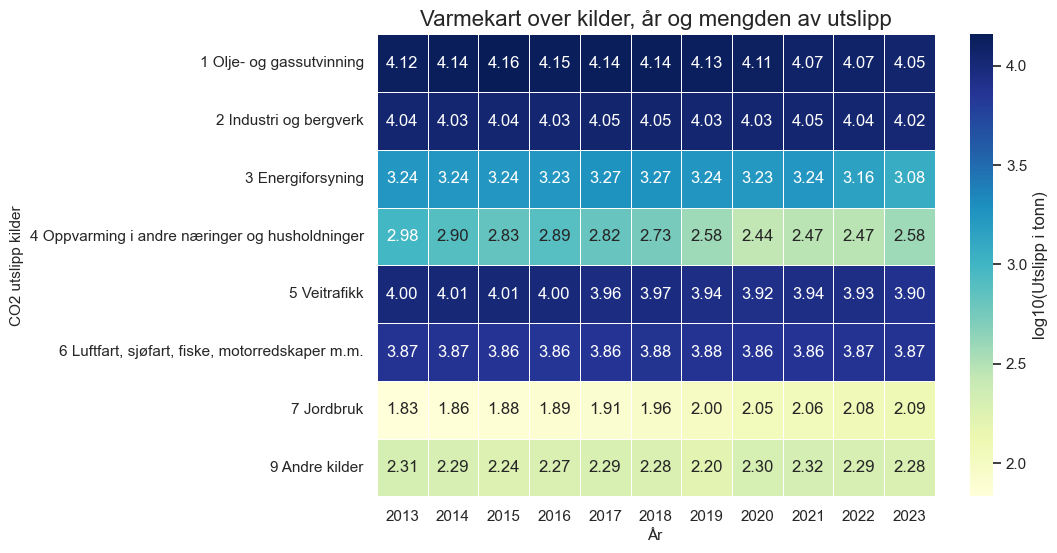

In [6]:
plotter.plot_co2_source_year_hm()


##### Lineær regresjon

I denne figuren har jeg fremstilt lineær regresjon ved bruk av to metoder. Den grønne linjen har jeg laget en modell som trener på 50 % av datasetett. Vi ser at den grønne linjen følger trenden til den synkende Co2 utslippet over tid. I likhet med den røde linjen som som også viser det samme.  Årsaken til at de likevel ikke har lik stigning kan være på grunn av den grønne linjen brukte 50 % av dataene or å trenes opp. Dette kan føre til ekstrem bratt og skjevheter. !00 % prediskjonenen er mer realistisk og fremstiller dataen mer stabilt.


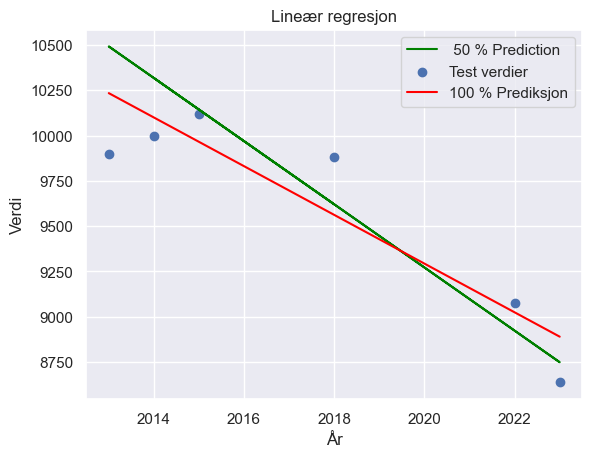

r2 =  0.6870286803599372


(StandardScaler(),
 LinearRegression(),
       år
 0   2013
 1   2014
 2   2015
 3   2016
 4   2017
 5   2018
 6   2019
 7   2020
 8   2021
 9   2022
 10  2023,
 array([[-1.58113883],
        [-1.26491106],
        [-0.9486833 ],
        [-0.63245553],
        [-0.31622777],
        [ 0.        ],
        [ 0.31622777],
        [ 0.63245553],
        [ 0.9486833 ],
        [ 1.26491106],
        [ 1.58113883]]))

In [7]:
plotters = plots_part_2(df)
plotters.linreg_train_test()



##### Lineær regresjon av kilde og mengde av utslipp

I figur 7 fremstilles dataen som en barplot. Modellen gir em gov oversikt for bekreftelse av gjennomsnitsdataen per kilde og svisualisert tidligere i statistikkedelen.

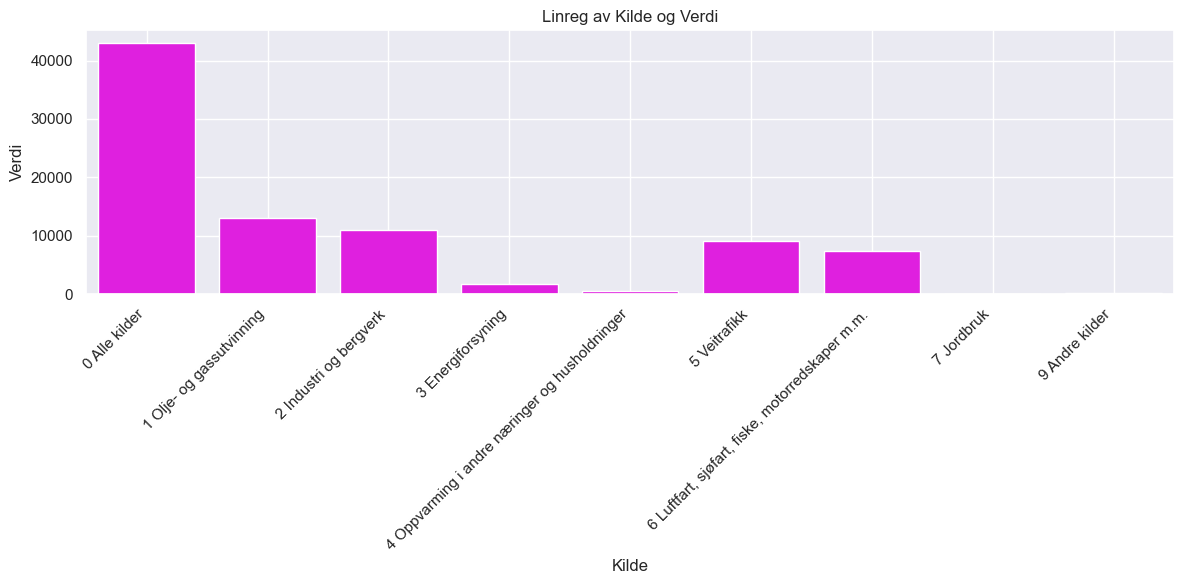

In [8]:
plotters = plots_part_2(df)
plotters.barplot()


##### Fremtids prediksjon

I denne figuren fremstillen de 2013-2023 og de neste 10 årene. Vi ser at figuren følger samme trend som den har gjort de siste årene. Vi kan bruke widgets til å se hvor mange år fremt i tid vi åøsnker å undersøke.


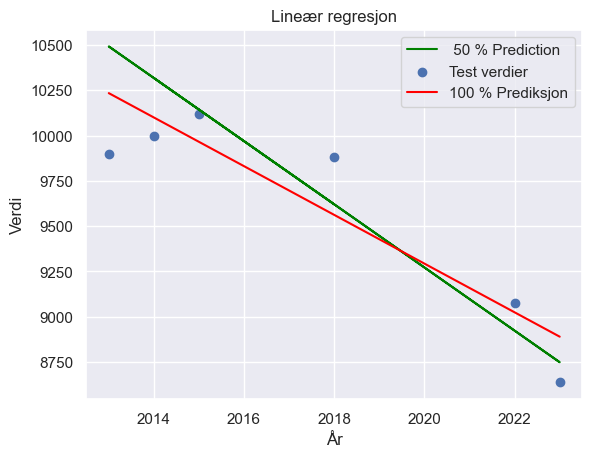

r2 =  0.6870286803599372


interactive(children=(IntSlider(value=2024, continuous_update=False, description='Velg år:', max=2033, min=202…

In [9]:
plotters = plots_part_2(df)
scaler_full, model_full, X, X_scaled_full = plotters.linreg_train_test()
plotters.futureplot(scaler_full, model_full, X, X_scaled_full)


##### Dataens ytelse

I den siste giguren tester vi dataen ytelse. Vi fjernder verdier og bruker linære regresjon til å imputerer verdier. Fremstillignen viser en scatterplot som er fullstendig rader. Grønne linjen viser verider som har vært imputert.

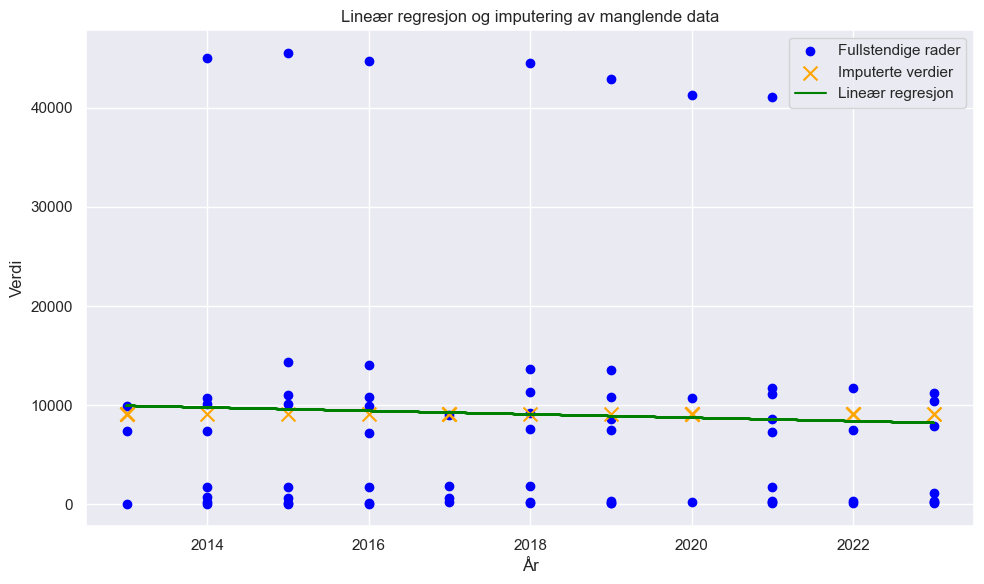

In [10]:
mv = MissingValues(df, legg_til_nans=True, andel_nans=0.3)
mv.plot_missing_data()
